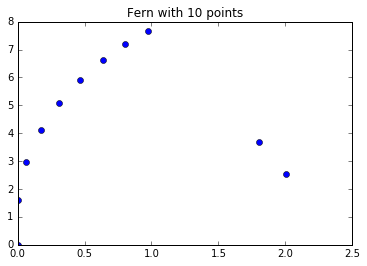

In [1]:
#P165 of "Doing Math with Python": Interactive version of drawing the Barnsley Fern

%matplotlib inline

from ipywidgets import interact
import ipywidgets as widgets

import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.04*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x  + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2,
                           transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_fern(n):
    # We start with (0, 0)
    x = [0]
    y = [0]
    x1, y1 = 0, 0
    for i in range(n):
       x1, y1 = transform((x1, y1))
       x.append(x1)
       y.append(y1)
    
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title('Fern with {0} points'.format(n))
    plt.show()
 
# Allow interaction via the interact() function and an Integer slider widget
i = interact(draw_fern, n=widgets.IntSlider(min=0, max=10000,step=1,value=10))